### RAGAS metrics

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
test_set = []
for i in range(5):
  test_set_i = pd.read_csv(f"../data/main-data/test-sets/testset-{i+1}.csv")
  test_set.append(test_set_i)

test_set_df = pd.concat(test_set).reset_index(drop=True)
df = pd.read_csv("../data/main-data/synthetic-resumes.csv")
test_result_df = pd.read_csv("../data/main-data/gpt4-ragfusion/evaluation-results.csv")

resume_id_dict = dict(zip(df["Resume"], df["ID"]))
id_resume_dict = dict(zip(df["ID"], df["Resume"]))

question_list = test_set_df["Job Description"]
ground_truth_list = test_set_df["Ground Truth"]

target = [resume_id_dict[resume] for resume in test_result_df["ground_truth"]]

In [3]:
def compute_mean_score(df, column_name):
  return np.mean(df[column_name])

def compute_mean_AS(df, column_name):
  df["selection"] = pd.Series([id_resume_dict[int(re.search("Applicant ID [0-9]+", resume).group()[13:])] for resume in df["answer"]])
  df = df[df["selection"] == df["ground_truth"]]
  return np.mean(df[column_name])

In [4]:
test_result_df_gpt4 = pd.read_csv("../data/main-data/gpt4-ragfusion/evaluation-results.csv")
test_result_df_gpt35 = pd.read_csv("../data/main-data/gpt35-ragfusion/evaluation-results.csv")
test_result_df_gpt35_norm = pd.read_csv("../data/main-data/gpt35-normalrag/evaluation-results.csv")

avg_context_precision_gpt4 = compute_mean_score(test_result_df_gpt4, "context_precision")
avg_context_recall_gpt4 = compute_mean_score(test_result_df_gpt4, "context_recall")
avg_faithfulness_gpt4 = compute_mean_score(test_result_df_gpt4, "faithfulness")
avg_answer_similarity_gpt4 = compute_mean_AS(test_result_df_gpt4, "answer_similarity")

avg_context_precision_gpt35 = compute_mean_score(test_result_df_gpt35, "context_precision")
avg_context_recall_gpt35 = compute_mean_score(test_result_df_gpt35, "context_recall")
avg_faithfulness_gpt35 = compute_mean_score(test_result_df_gpt35, "faithfulness")
avg_answer_similarity_gpt35 = compute_mean_AS(test_result_df_gpt35, "answer_similarity")

avg_context_precision_gpt35_norm = compute_mean_score(test_result_df_gpt35_norm, "context_precision")
avg_context_recall_gpt35_norm = compute_mean_score(test_result_df_gpt35_norm, "context_recall")
avg_faithfulness_gpt35_norm = compute_mean_score(test_result_df_gpt35_norm, "faithfulness")
avg_answer_similarity_gpt35_norm = compute_mean_AS(test_result_df_gpt35_norm, "answer_similarity")

print(f"GPT-4 + RAG Fusion:\nContext precision: {avg_context_precision_gpt4}\nContext recall: {avg_context_recall_gpt4}\nFaithfulness: {avg_faithfulness_gpt4}\nAnswer similarity: {avg_answer_similarity_gpt4}\n")
print(f"GPT-3.5 + RAG Fusion:\nContext precision: {avg_context_precision_gpt35}\nContext recall: {avg_context_recall_gpt35}\nFaithfulness: {avg_faithfulness_gpt35}\nAnswer similarity: {avg_answer_similarity_gpt35}\n")
print(f"GPT-3.5 + Normal RAG:\nContext precision: {avg_context_precision_gpt35_norm}\nContext recall: {avg_context_recall_gpt35_norm}\nFaithfulness: {avg_faithfulness_gpt35_norm}\nAnswer similarity: {avg_answer_similarity_gpt35_norm}\n")

GPT-4 + RAG Fusion:
Context precision: 0.7926721455761143
Context recall: 0.8434011659915275
Faithfulness: 0.9449809376974733
Answer similarity: 0.7680977994067107

GPT-3.5 + RAG Fusion:
Context precision: 0.768618617227063
Context recall: 0.8366632026591785
Faithfulness: 0.8462636787366434
Answer similarity: 0.740111177524955

GPT-3.5 + Normal RAG:
Context precision: 0.7867132112664911
Context recall: 0.8366171860593767
Faithfulness: 0.8868767785434454
Answer similarity: 0.7474865277081579



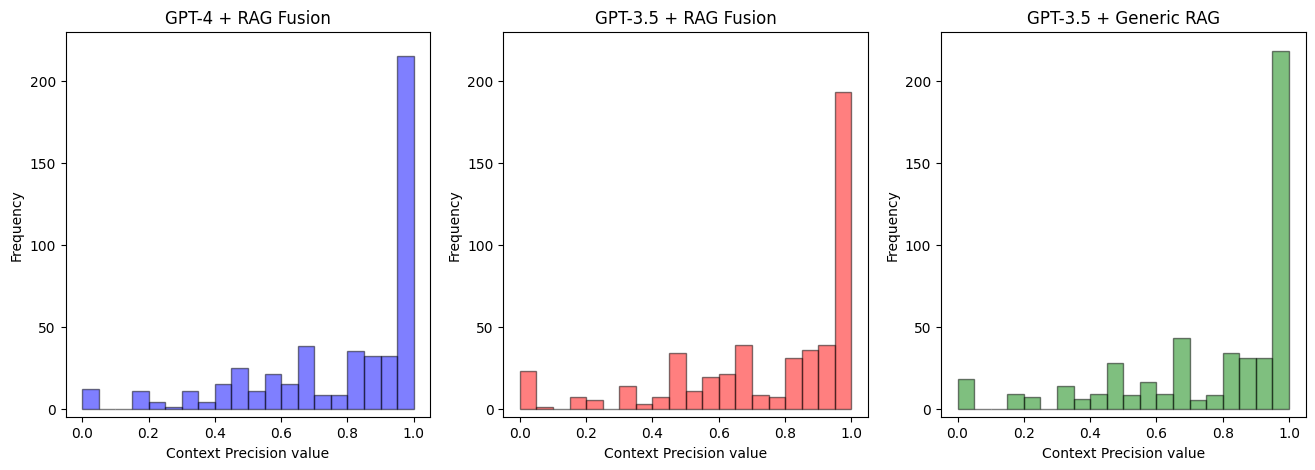

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

test_result_df_gpt4["context_precision"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'b', ax=axs[0], grid=False)
axs[0].set_ylim([-5, 230])
axs[0].set_title("GPT-4 + RAG Fusion")
axs[0].set_xlabel("Context Precision value")
axs[0].set_ylabel("Frequency")

test_result_df_gpt35["context_precision"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'r', ax=axs[1], grid=False)
axs[1].set_ylim([-5, 230])
axs[1].set_title("GPT-3.5 + RAG Fusion")
axs[1].set_xlabel("Context Precision value")
axs[1].set_ylabel("Frequency")

test_result_df_gpt35_norm["context_precision"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'g', ax=axs[2], grid=False)
axs[2].set_ylim([-5, 230])
axs[2].set_title("GPT-3.5 + Generic RAG")
axs[2].set_xlabel("Context Precision value")
axs[2].set_ylabel("Frequency")

plt.savefig("CP.png")

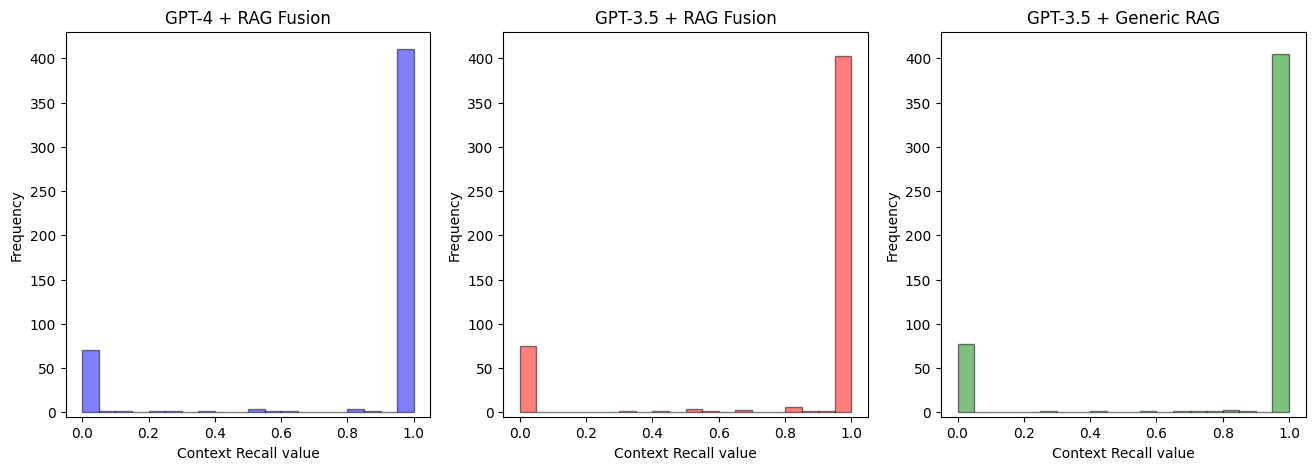

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

test_result_df_gpt4["context_recall"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'b', ax=axs[0], grid=False)
axs[0].set_ylim([-5, 430])
axs[0].set_title("GPT-4 + RAG Fusion")
axs[0].set_xlabel("Context Recall value")
axs[0].set_ylabel("Frequency")

test_result_df_gpt35["context_recall"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'r', ax=axs[1], grid=False)
axs[1].set_ylim([-5, 430])
axs[1].set_title("GPT-3.5 + RAG Fusion")
axs[1].set_xlabel("Context Recall value")
axs[1].set_ylabel("Frequency")

test_result_df_gpt35_norm["context_recall"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'g', ax=axs[2], grid=False)
axs[2].set_ylim([-5, 430])
axs[2].set_title("GPT-3.5 + Generic RAG")
axs[2].set_xlabel("Context Recall value")
axs[2].set_ylabel("Frequency")

plt.savefig("CR.png")

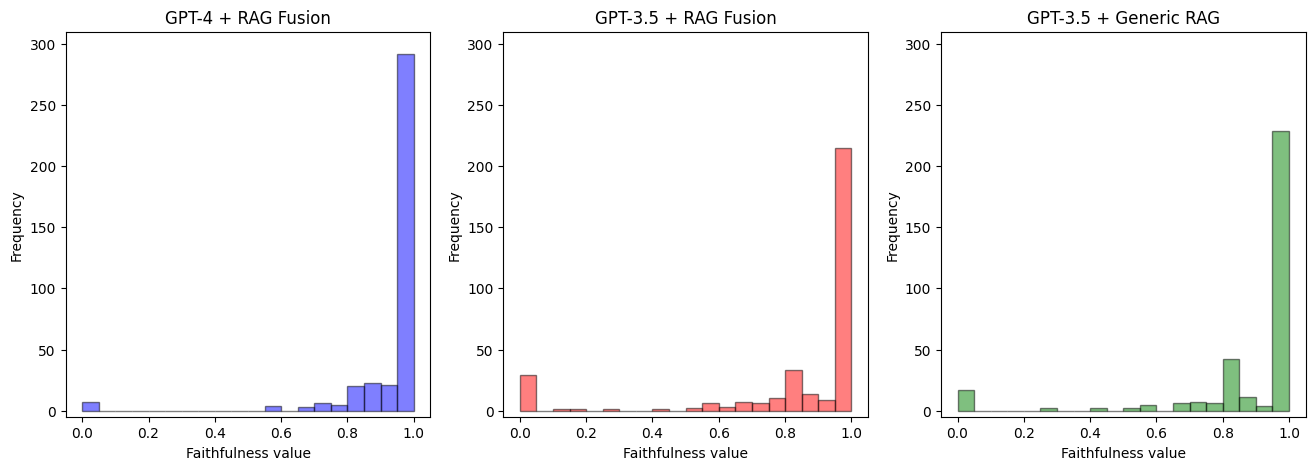

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

test_result_df_gpt4["faithfulness"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'b', ax=axs[0], grid=False)
axs[0].set_ylim([-5, 310])
axs[0].set_title("GPT-4 + RAG Fusion")
axs[0].set_xlabel("Faithfulness value")
axs[0].set_ylabel("Frequency")

test_result_df_gpt35["faithfulness"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'r', ax=axs[1], grid=False)
axs[1].set_ylim([-5, 310])
axs[1].set_title("GPT-3.5 + RAG Fusion")
axs[1].set_xlabel("Faithfulness value")
axs[1].set_ylabel("Frequency")

test_result_df_gpt35_norm["faithfulness"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'g', ax=axs[2], grid=False)
axs[2].set_ylim([-5, 310])
axs[2].set_title("GPT-3.5 + Generic RAG")
axs[2].set_xlabel("Faithfulness value")
axs[2].set_ylabel("Frequency")

plt.savefig("FA.png")

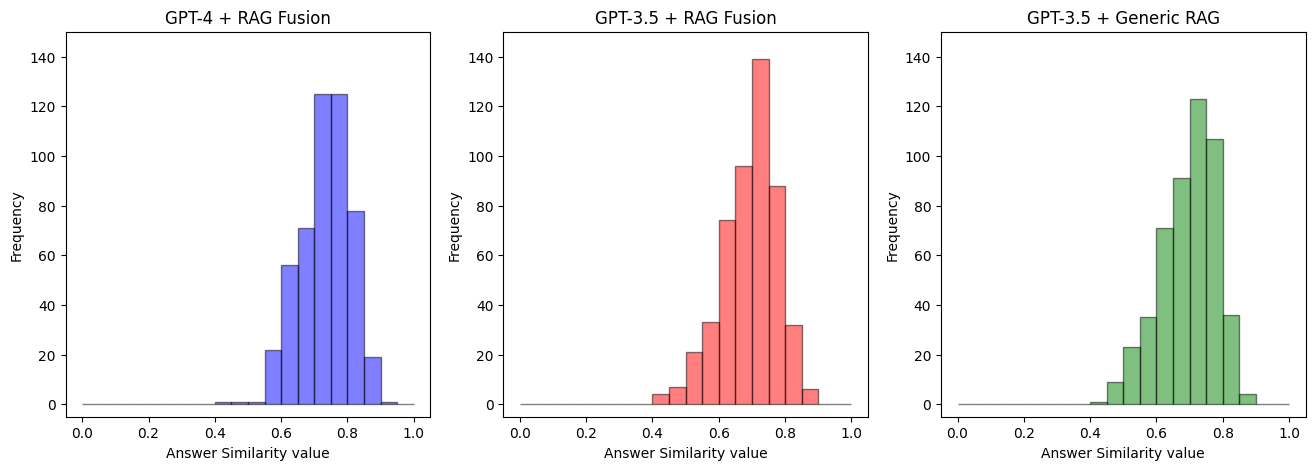

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

test_result_df_gpt4["answer_similarity"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'b', ax=axs[0], grid=False)
axs[0].set_ylim([-5, 150])
axs[0].set_title("GPT-4 + RAG Fusion")
axs[0].set_xlabel("Answer Similarity value")
axs[0].set_ylabel("Frequency")
test_result_df_gpt35["answer_similarity"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'r', ax=axs[1], grid=False)
axs[1].set_ylim([-5, 150])
axs[1].set_title("GPT-3.5 + RAG Fusion")
axs[1].set_xlabel("Answer Similarity value")
axs[1].set_ylabel("Frequency")
test_result_df_gpt35_norm["answer_similarity"].hist(bins=np.arange(0, 1.05, 0.05), edgecolor="black", alpha=0.5, color= 'g', ax=axs[2], grid=False)
axs[2].set_ylim([-5, 150])
axs[2].set_title("GPT-3.5 + Generic RAG")
axs[2].set_xlabel("Answer Similarity value")
axs[2].set_ylabel("Frequency")

plt.savefig("AS.png")

### Accuracy & Semantic Similarity

In [9]:
import sys, httpx, os, re
import pandas as pd
import torch
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores.faiss import DistanceStrategy
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

In [10]:
DATA_PATH = "../data/main-data/synthetic-resumes.csv"
FAISS_PATH = "../vectorstore"
RAG_K_THRESHOLD = 10
EMBEDDING_MODEL = "sentence-transformers/all-MiniLM-L6-v2"
OPENAI_ENDPOINT = "https://aalto-openai-apigw.azure-api.net"
OPENAI_KEY = ""

In [11]:
embedding_model = HuggingFaceEmbeddings(
  model_name=EMBEDDING_MODEL,
  model_kwargs={"device": "cpu"},
)

vectorstore_db = FAISS.load_local(FAISS_PATH, embedding_model, distance_strategy=DistanceStrategy.COSINE)

In [12]:
predicted = [int(re.search("Applicant ID [0-9]+", resume).group()[13:]) for resume in test_result_df["answer"]]

count = 0
for i in range(len(target)):
  if target[i] == predicted[i]:
    count += 1

print(count / len(target))

0.558


In [13]:
test_set = []
for i in range(5):
  test_set_i = pd.read_csv(f"../data/main-data/test-sets/testset-{i+1}.csv")
  test_set.append(test_set_i)

test_set_df = pd.concat(test_set).reset_index(drop=True)

df = pd.read_csv("../data/main-data/synthetic-resumes.csv")

resume_id_dict = dict(zip(df["Resume"], df["ID"]))
id_resume_dict = dict(zip(df["ID"], df["Resume"]))

question_list = test_set_df["Job Description"]
ground_truth_list = test_set_df["Ground Truth"]

target = [resume_id_dict[resume] for resume in test_result_df["ground_truth"]]

In [14]:
from ast import literal_eval

retriever_results = []
for i in range(5):
  retriever_results_i = pd.read_csv(f"../data/main-data/rag-retriever/test-results/testres-{i+1}.csv")
  retriever_results.append(retriever_results_i)

retriever_results_df = pd.concat(retriever_results).reset_index(drop=True)

df = pd.read_csv("../data/main-data/synthetic-resumes.csv")

retriever_results_df["answer"]

# test_result_df_gpt35_norm["contexts"] = test_result_df_gpt35_norm["contexts"].apply(literal_eval)

0      Applicant ID 946\n: \n\nObjective: Seeking the...
1      Applicant ID 108\n ():\n\nName: John Smith\n\n...
2      Applicant ID 14\n ():\n \nSummary: \nA skilled...
3      Applicant ID 956\n - :\n\nName: John Smith\nEm...
4      Applicant ID 873\n – \n\nObjective: iOS Develo...
                             ...                        
495    Applicant ID 115\n - \n-----------------------...
496    Applicant ID 498\nData Analyst\nAs a Data Anal...
497    Applicant ID 758\n ():\n\nName: Jane Smith\n\n...
498    Applicant ID 108\n ():\n\nName: John Smith\n\n...
499    Applicant ID 5\n - \n\nName: John Doe\nEmail: ...
Name: answer, Length: 500, dtype: object

In [15]:
test_result_df_gpt4 = pd.read_csv("../data/main-data/gpt4-ragfusion/evaluation-results.csv")
predicted_gpt4 = [int(re.search("Applicant ID [0-9]+", resume).group()[13:]) for resume in test_result_df_gpt4["answer"]]
predicted_gpt4_doc = [id_resume_dict[id] for id in predicted_gpt4]

test_result_df_gpt35 = pd.read_csv("../data/main-data/gpt35-ragfusion/evaluation-results.csv")
predicted_gpt35 = [int(re.search("Applicant ID [0-9]+", resume).group()[13:]) for resume in test_result_df_gpt35["answer"]]
predicted_gpt35_doc = [id_resume_dict[id] for id in predicted_gpt35]

test_result_df_gpt35_normal = pd.read_csv("../data/main-data/gpt35-normalrag/evaluation-results.csv")
predicted_gpt35_normal = [int(re.search("Applicant ID [0-9]+", resume).group()[13:]) for resume in test_result_df_gpt35_normal["answer"]]
predicted_gpt35_normal_doc = [id_resume_dict[id] for id in predicted_gpt35_normal]

predicted_retriever = [int(re.search("Applicant ID [0-9]+", resume).group()[13:]) for resume in retriever_results_df["answer"]]
predicted_retriever_doc = [id_resume_dict[id] for id in predicted_retriever]

In [16]:
predicted_gpt4_embeddings = embedding_model.embed_documents(predicted_gpt4_doc)
predicted_gpt35_embeddings = embedding_model.embed_documents(predicted_gpt35_doc)
predicted_gpt35_normal_embeddings = embedding_model.embed_documents(predicted_gpt35_normal_doc)
predicted_retriever_embeddings = embedding_model.embed_documents(predicted_retriever_doc)

In [17]:
target_embeddings = embedding_model.embed_documents(test_result_df["ground_truth"])

In [18]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
  cos_sim = dot(a, b)/(norm(a)*norm(b))
  return cos_sim

In [19]:
cos_sim_gpt4 = []
cos_sim_gpt35 = []
cos_sim_gpt35_normal = []
cos_sim_predicted_retriever = []

for i in range(len(target_embeddings)):
  cos_sim_gpt4.append(cosine_similarity(predicted_gpt4_embeddings[i], target_embeddings[i]))
  cos_sim_gpt35.append(cosine_similarity(predicted_gpt35_embeddings[i], target_embeddings[i]))
  cos_sim_gpt35_normal.append(cosine_similarity(predicted_gpt35_normal_embeddings[i], target_embeddings[i]))
  cos_sim_predicted_retriever.append(cosine_similarity(predicted_retriever_embeddings[i], target_embeddings[i]))


In [20]:
np.mean(cos_sim_predicted_retriever)

0.8352285880022677

In [21]:
np.mean(cos_sim_gpt4)

0.8852830937992958

In [22]:
np.mean(cos_sim_gpt35)

0.8509934398964313

In [23]:
np.mean(cos_sim_gpt35_normal)

0.8520774117594678

In [24]:
count = 0
for i in range(len(target)):
  if target[i] == predicted_retriever[i]:
    count += 1

print(count / len(target))

0.358
